Variational Quantum Time Evolution

In [1]:
from qiskit.quantum_info import SparsePauliOp

hamiltonian = SparsePauliOp(['ZZ',  'IX', 'XI'],
              coeffs=[-0.2 , -1, -1])

magnetization = SparsePauliOp([ 'IZ', 'ZI'], coeffs=[1, 1])

c:\Users\Tim\.conda\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


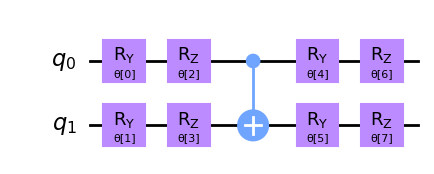

In [2]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
ansatz.decompose().draw('mpl')

In [ ]:
import numpy as np

init_param_values={}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]]=np.pi/2

In [ ]:
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple

var_principle = ImaginaryMcLachlanPrinciple()

In [ ]:
from qiskit_algorithms import TimeEvolutionProblem

time = 5.0
aux_ops = [hamiltonian]
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)

In [ ]:
from qiskit_algorithms import VarQITE
from qiskit.primitives import Estimator

var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
# an Estimator instance is necessary, if we want to calculate the expectation value of auxiliary operators.
evolution_result = var_qite.evolve(evolution_problem)

In [ ]:
from qiskit.quantum_info import Statevector

init_state = Statevector(ansatz.assign_parameters(init_param_values))

In [ ]:
from qiskit_algorithms import SciPyImaginaryEvolver

evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=501)
sol = exact_evol.evolve(evolution_problem)

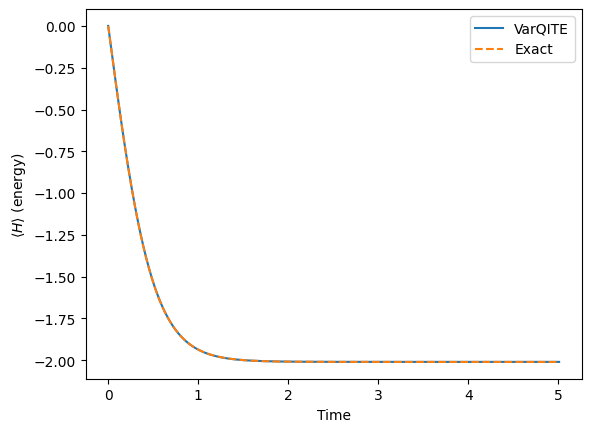

In [ ]:
import pylab

h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right")

In [ ]:
print("Ground state energy", h_exp_val[-1])

Ground state energy -2.0097479079521188


In [ ]:
from qiskit_algorithms.gradients import ReverseEstimatorGradient, ReverseQGT

var_principle = ImaginaryMcLachlanPrinciple(qgt=ReverseQGT() , gradient=ReverseEstimatorGradient())
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_eff = var_qite.evolve(evolution_problem)

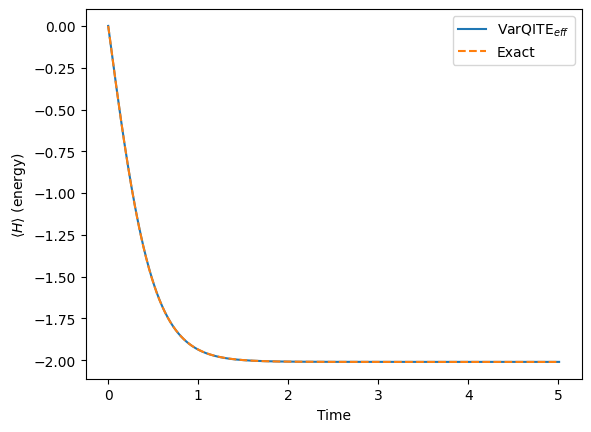

In [ ]:
h_exp_val_eff = np.array([ele[0][0] for ele in evolution_result_eff.observables])

exact_h_exp_val_eff = sol.observables[0][0].real

times = evolution_result_eff.times
pylab.plot(times, h_exp_val_eff, label= r"VarQITE$_{eff}$")
pylab.plot(times, exact_h_exp_val_eff , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right")

In [ ]:
print("Ground state energy", h_exp_val_eff[-1])

Ground state energy -2.009747907952119


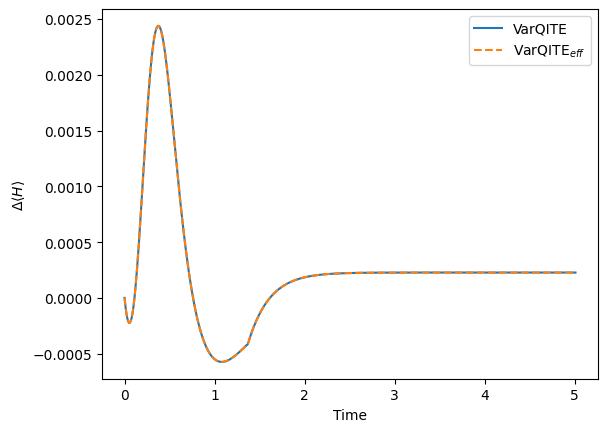

In [ ]:
pylab.plot(times, (h_exp_val-exact_h_exp_val), label="VarQITE")
pylab.plot(times, (h_exp_val_eff-exact_h_exp_val_eff), label=r"VarQITE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle H \rangle$")
pylab.legend(loc="upper right")

c:\Users\Tim\.conda\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


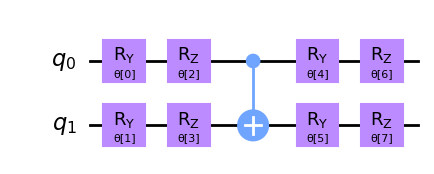

In [ ]:
ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
ansatz.decompose().draw('mpl')


In [ ]:
init_param_values = {}

for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = np.pi/2

In [ ]:
init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)
Statevector([-5.00000000e-01+0.00000000e+00j,
             -5.00000000e-01-5.55111512e-17j,
              0.00000000e+00-5.00000000e-01j,
              1.66533454e-16+5.00000000e-01j],
            dims=(2, 2))

Statevector([-0.5+0.j , -0.5+0.j ,  0. -0.5j,  0. +0.5j],
            dims=(2, 2))
Statevector([ 5.00000000e-01+0.00000000e+00j,
             -5.00000000e-01-5.55111512e-17j,
              0.00000000e+00-5.00000000e-01j,
              1.66533454e-16+5.00000000e-01j],
            dims=(2, 2))


In [ ]:
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple

var_principle = RealMcLachlanPrinciple()

In [ ]:
aux_ops = [magnetization]

In [ ]:
from qiskit_algorithms import VarQRTE

time = 10.0
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qrte = VarQRTE(ansatz, init_param_values,var_principle, Estimator())
evolution_result_re = var_qrte.evolve(evolution_problem)

In [ ]:
init_circ = ansatz.assign_parameters(init_param_values)

In [ ]:
from qiskit_algorithms import SciPyRealEvolver

evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state = init_circ, aux_operators=aux_ops)
rtev = SciPyRealEvolver(1001)
sol = rtev.evolve(evolution_problem)

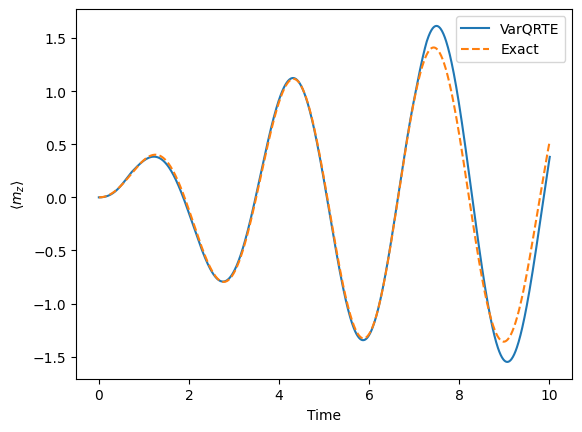

In [ ]:
mz_exp_val_re = np.array([ele[0][0] for ele in evolution_result_re.observables])
exact_mz_exp_val_re = sol.observables[0][0].real
times = evolution_result_re.times
pylab.plot(times, mz_exp_val_re, label= "VarQRTE")
pylab.plot(times, exact_mz_exp_val_re , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle m_z \rangle$")
pylab.legend(loc="upper right")

In [ ]:
from qiskit_algorithms.gradients import DerivativeType

var_principle = RealMcLachlanPrinciple(qgt=ReverseQGT() , gradient=ReverseEstimatorGradient(derivative_type=DerivativeType.IMAG))
time = 10.0
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qrte = VarQRTE(ansatz, init_param_values,var_principle, Estimator())
evolution_result_re_eff = var_qrte.evolve(evolution_problem)

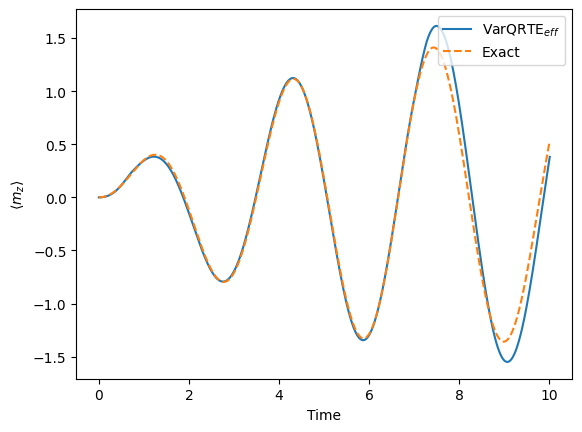

In [ ]:
mz_exp_val_re_eff = np.array([ele[0][0] for ele in evolution_result_re_eff.observables])
pylab.plot(times, mz_exp_val_re_eff, label= r"VarQRTE$_{eff}$")
pylab.plot(times, exact_mz_exp_val_re , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle m_z \rangle$")
pylab.legend(loc="upper right")

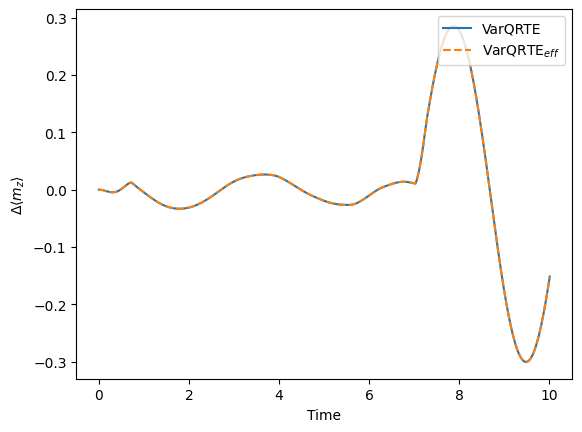

In [ ]:
pylab.plot(times, (mz_exp_val_re-exact_mz_exp_val_re), label= "VarQRTE")
pylab.plot(times, (mz_exp_val_re_eff-exact_mz_exp_val_re), label= r"VarQRTE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle m_z \rangle$")
pylab.legend(loc="upper right")

For 8 site with variational quantum time evolution

In [3]:
from qiskit.quantum_info import SparsePauliOp
from math import sin, cos

def get_hamiltonian(L, J, h, alpha=0):

    # List of Hamiltonian terms as 3-tuples containing
    # (1) the Pauli string,
    # (2) the qubit indices corresponding to the Pauli string,
    # (3) the coefficient.
    ZZ_tuples = [('ZZ', [i, i + 1], -J) for i in range(0, L-1)]
    Z_tuples = [('Z', [i], -h * sin(alpha)) for i in range(0, L)]
    X_tuples = [('X', [i], -h * cos(alpha)) for i in range(0, L)]

    # We create the Hamiltonian as a SparsePauliOp, via the method
    # `from_sparse_list`, and multiply by the interaction term.
    hamiltonian = SparsePauliOp.from_sparse_list([*ZZ_tuples, *Z_tuples, *X_tuples], num_qubits=L)
    return hamiltonian.simplify()

In [26]:
from math import pi

hamiltonian = get_hamiltonian(L=4, J=.2, h=1., alpha=0)

SparsePauliOp(['ZZ', 'IZ', 'ZI', 'IX', 'XI'],
              coeffs=[-0.2+0.j,0,0, -1+0.j,
 -1+0.j])


SparsePauliOp(['ZZ', 'IZ', 'ZI', 'IX', 'XI'],
              coeffs=[-0.2+0.j,  0. +0.j,  0. +0.j, -1. +0.j, -1. +0.j])

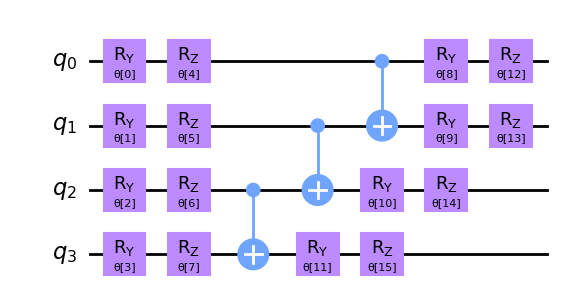

In [27]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
ansatz.decompose().draw('mpl')

In [29]:
import numpy as np

init_param_values={}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]]=np.pi/2

In [30]:
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple

var_principle = ImaginaryMcLachlanPrinciple()

In [31]:
from qiskit_algorithms import TimeEvolutionProblem

time = 5.0
aux_ops = [hamiltonian]
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)

In [17]:
from qiskit_algorithms import VarQITE
from qiskit.primitives import Estimator

var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
# an Estimator instance is necessary, if we want to calculate the expectation value of auxiliary operators.
evolution_result = var_qite.evolve(evolution_problem)

It spends 50m for calculation.

In [32]:
from qiskit.quantum_info import Statevector

init_state = Statevector(ansatz.assign_parameters(init_param_values))

In [19]:
from qiskit_algorithms import SciPyImaginaryEvolver

evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=501)
sol = exact_evol.evolve(evolution_problem)

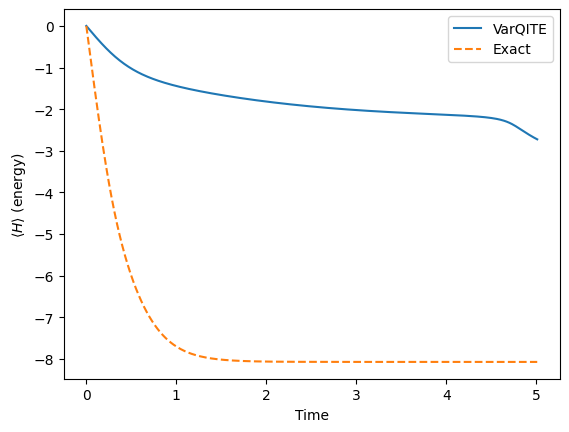

In [20]:
import pylab

h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right")

In [21]:
print("Ground state energy", h_exp_val[-1])

Ground state energy -2.7240017873705504


In [33]:
from qiskit_algorithms.gradients import ReverseEstimatorGradient, ReverseQGT

var_principle = ImaginaryMcLachlanPrinciple(qgt=ReverseQGT() , gradient=ReverseEstimatorGradient())
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_eff = var_qite.evolve(evolution_problem)

It spends 11m for calculation.

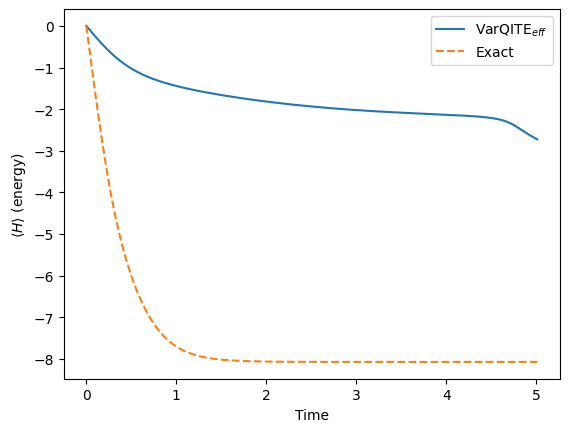

In [23]:
h_exp_val_eff = np.array([ele[0][0] for ele in evolution_result_eff.observables])

exact_h_exp_val_eff = sol.observables[0][0].real

times = evolution_result_eff.times
pylab.plot(times, h_exp_val_eff, label= r"VarQITE$_{eff}$")
pylab.plot(times, exact_h_exp_val_eff , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right")

In [24]:
print("Ground state energy", h_exp_val_eff[-1])

Ground state energy -2.7240017873713906


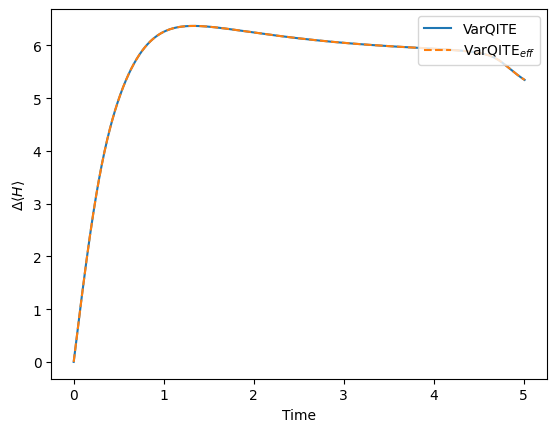

In [25]:
pylab.plot(times, (h_exp_val-exact_h_exp_val), label="VarQITE")
pylab.plot(times, (h_exp_val_eff-exact_h_exp_val_eff), label=r"VarQITE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle H \rangle$")
pylab.legend(loc="upper right")